<a href="https://colab.research.google.com/github/neuromatch/course-content-template/blob/main/tutorials/W1D2_Template/W1D2_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/course-content-template/main/tutorials/W1D2_Template/W1D2_Tutorial1.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 1: The problem of changing data distributions

**Week 2, Day 4: Macro-Learning**

**By Neuromatch Academy**

__Content creators:__ Hlib Solodzhuk, Ximeng Mao, Grace Lindsay

__Content reviewers:__ Names & Surnames

__Production editors:__ Names & Surnames

<br>

Acknowledgments: [ACKNOWLEDGMENT_INFORMATION]


___


# Tutorial Objectives

*Estimated timing of tutorial: 35 minutes*

In this tutorial, we will explore the problems that come from *distribution shifts*. Distribution shifts occur the testing data distribution strays from training data distribution; that is, when a model is evaluated on data that somehow differs from what it was trained on.

There are many ways that testing data can differ from training data. Two broad categories of distribution shifts are: **covariate shift** and **concept shift**.

In the first, the distribution of input features changes. For example, consider a dog/cat classification task where the model was trained to differentiate between real-photos of pets while the testing dataset consists fully of cartoon characters.

The second, as it name suggests, is more of the conceptual change in the relationship between features and desired output. For example, the recommendation system may learn a users preferences, but then those preferences change.

We will explore both types of shifts on a simple function which represents the relationship between day of the year and price for the fruits in the local market.

In [21]:
# @title Tutorial slides
# @markdown These are the slides for the videos in all tutorials today

# from IPython.display import IFrame
#link_id = "<YOUR_LINK_ID_HERE>"
# print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
#IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{link_id}/?direct%26mode=render", width=854, height=480)

---
# Setup



In [2]:
# @title Install and import feedback gadget

# !pip3 install vibecheck datatops --quiet

# from vibecheck import DatatopsContentReviewContainer
# def content_review(notebook_section: str):
#     return DatatopsContentReviewContainer(
#         "",  # No text prompt - leave this as is
#         notebook_section,
#         {
#             "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
#             "name": "sciencematch_sm", # change the name of the course : neuromatch_dl, climatematch_ct, etc
#             "user_key": "y1x3mpx5",
#         },
#     ).render()

# feedback_prefix = "W2D4_T1"

In [3]:
# Imports

#working with data
import numpy as np

#plotting
import matplotlib.pyplot as plt
import logging

#interactive display
import ipywidgets as widgets

#modeling
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [4]:
# @title Figure settings

logging.getLogger('matplotlib.font_manager').disabled = True

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # perfrom high definition rendering for images and plots
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [5]:
# @title Plotting functions

def predict(start_month, end_month):
    """
    Predicts the prices for a given date range and plots the true and predicted prices.

    Inputs:
    - start_month (str): The starting month for the prediction range.
    - end_month (str): The ending month for the prediction range.

    Raises:
    - ValueError: If the specified start_month is after the end_month.
    """

    #check for feasibility of prompt:)
    if months.index(start_month) > months.index(end_month):
        raise ValueError("Please enter valid month interval.")

    #find days and prices for the selected interval
    selected_days = np.expand_dims(days[int(np.sum(months_durations[:months.index(start_month)])) : int(np.sum(months_durations[:months.index(end_month)+1]))], 1)
    selected_prices = prices[int(np.sum(months_durations[:months.index(start_month)])) : int(np.sum(months_durations[:months.index(end_month)+1]))]

    #normalize selected days
    selected_days_norm = (selected_days - summer_days_mean) / summer_days_std

    #evaluate MLP on normalized selected data
    print(f"R-squared value is: {model.score(selected_days_norm, selected_prices):.02f}.")

    #predict for selected dates
    selected_prices_predictions = model.predict(selected_days_norm)


    #plot true and predicted data
    with plt.xkcd():
      plt.plot(selected_days, selected_prices, label = "True Data")
      plt.scatter(selected_days, selected_prices_predictions, label = f"From {start_month} to {end_month} Predictions", marker='o', color='r', zorder=2)
      plt.xlabel('Day')
      plt.ylabel('Price')
      plt.axvspan(days[151], days[242], facecolor='gray', alpha=0.1, label = "Training period")  #add grey background for summer days to see training data
      plt.xlim(np.min(selected_days), np.max(selected_days))
      plt.legend()
      plt.show()

In [6]:
# @title Helper functions

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

months_durations = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

In [ ]:
# @title Video 1: Distribution shifts

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

# video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
# tab_contents = display_videos(video_ids, W=854, H=480)
# tabs = widgets.Tab()
# tabs.children = tab_contents
# for i in range(len(tab_contents)):
#   tabs.set_title(i, video_ids[i][0])
# display(tabs)

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_distribution_shifts")

---

# Section 1: Covariate shift

In this section we are going to discuss case of covariate shift in distribution - when the distribution of features (usually denoted by $\mathbf{x}$) differs in training and testing data.

## Coding Exercise 1: Fitting pricing data to MLP

In this exercise we are going to train a Multi-Layer Perceptron (fully-connected neural network with non-linear ReLU activation functions) to predict prices for fruits.

As was mentioned in the video, we will model the price of fruits with the following function:

$$f(x) = A x^{2} + B sin(\pi x + \phi) + C$$

meaning that we have quadratic annual behaviour (with summer months being at the bottom of the parabola) as well as bi-weekly seasonality introduced by $sin(\pi x)$ term (with top values being the days where there is supply of fresh fruits to the market). Variables $A, B, \phi \:\: \text{and} \:\: C$ allow us to tune the day-price relation in different cases (for example, we will observe the role of $\phi$ in the second section of the tutorial). For this particular one, let us take $A = 0.005$, $B = 0.1$, $\phi = 0$ and $C = 1$.

At first, let's take a look at the data - we will plot it.


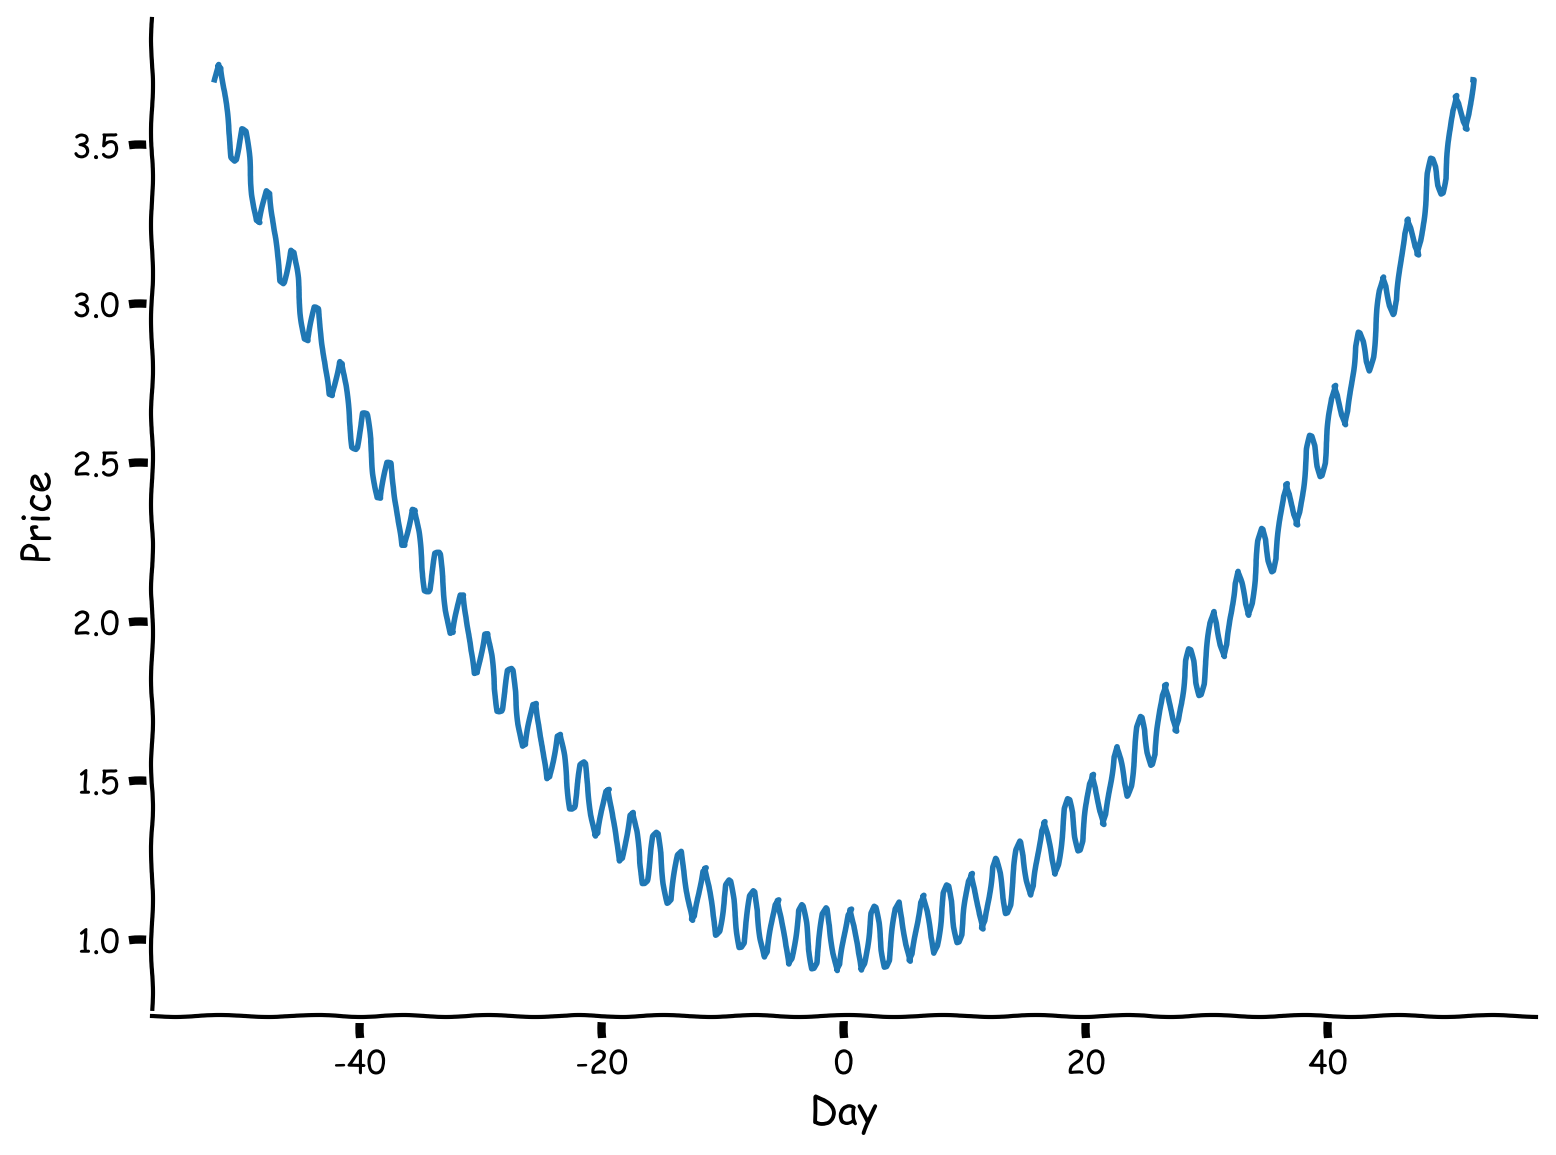

In [ ]:
#define variables
A = .005
B = 0.1
phi = 0
C = 1

#define days (observe that those are not 1, ..., 365 but proxy ones to make model function neat)
days = np.arange(-26, 26 + 1/7, 1/7)

###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: need to complete days-prices relation formula")
###################################################################
prices = ... * ...**2 + ... * np.sin(np.pi * ... + ...) + ...

#plot relation between days and prices
with plt.xkcd():
  plt.plot(days, prices)
  plt.xlabel('Day')
  plt.ylabel('Price')
  plt.show()

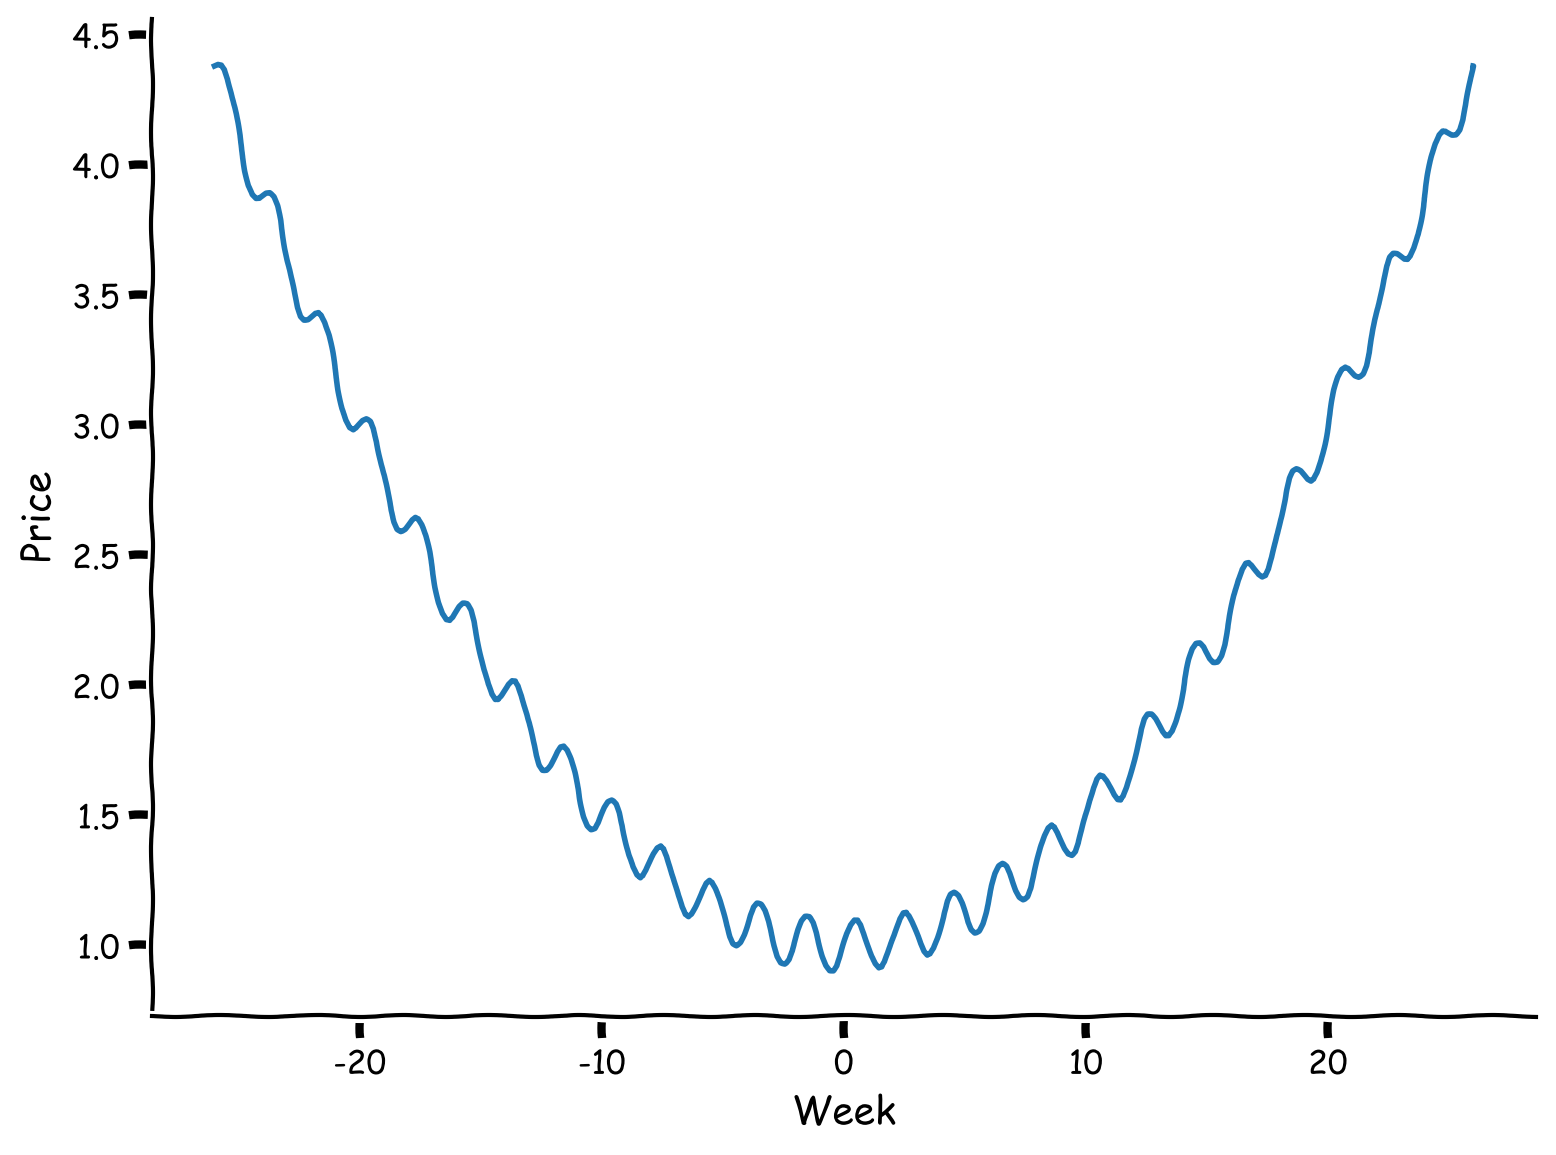

In [7]:
# to_remove solution

#define variables
A = .005
B = 0.1
phi = 0
C = 1

#define days (observe that those are not 1, ..., 365 but proxy ones to make model function neat)
days = np.arange(-26, 26 + 1/7, 1/7) #defined as fractions of a week

prices = A * days**2 + B * np.sin(np.pi * days + phi) + C

#plot relation between days and prices
with plt.xkcd():
  plt.plot(days, prices)
  plt.xlabel('Week')
  plt.ylabel('Price')
  plt.show()

Let's make sure that we have indeed have 365 days and 26 local maxima (which equals the number of weeks divided by two as we ahve supply bi-weekly).

In [8]:
print(f"The number of days is {days.shape[0]}.")

The number of days is 365.


In [9]:
print(f"The number of peaks is {np.sum((np.diff(prices)[:-1] > 0) & (np.diff(prices)[1:] < 0))}.")

The number of peaks is 26.


**Now, we are ready to train the model to predict the price of the fruits.** First we will assume we have only been to the markey during summer and so only have that data to train in. For this, we need to take data only about summer months and feed it into MLP.

As usual, the data is going to be separated into 2 distinct classes: train & test. And we will measure its performormance with the R-squared metric. We will also normalize the data to provide better learning stability for the model.

The MLP consists of 2 hidden layers with 100 neurons in each. We use `LBFGS` as solver for this partiuclar scenario as it performs better, compared to `Adam` or `SGD`, when the number of data points is limited.

In [ ]:
#take only summer data
summer_days = np.expand_dims(days[151:243], 1)
summer_prices = prices[151:243]

#divide data into train and test sets
summer_days_train, summer_days_test, summer_prices_train, summer_prices_test = train_test_split(summer_days, summer_prices, random_state = 42)

###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: need to normalized days and to fit model with it")
###################################################################

#apply normalization for days
summer_days_mean, summer_days_std = ...(...), ...(...)
summer_days_train_norm = (summer_days_train - ...) / ...
summer_days_test_norm = (summer_days_test - ...) / ...

#define MLP
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=10000, random_state = 42, solver = "lbfgs") # LBFGS is better to use when there is small amount of data

#train MLP
model.fit(..., ...)

#evaluate MLP on test data
print(f"R-squared value is: {model.score(summer_days_test_norm, summer_prices_test):.02f}.")

R-squared value is: 0.83.


In [10]:
# to_remove solution

#take only summer data
summer_days = np.expand_dims(days[151:243], 1)
summer_prices = prices[151:243]

#divide data into train and test sets
summer_days_train, summer_days_test, summer_prices_train, summer_prices_test = train_test_split(summer_days, summer_prices, random_state = 42)

#apply normalization for days
summer_days_mean, summer_days_std = np.mean(summer_days), np.std(summer_days)
summer_days_train_norm = (summer_days_train - summer_days_mean) / summer_days_std
summer_days_test_norm = (summer_days_test - summer_days_mean) / summer_days_std

#define MLP
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=10000, random_state = 42, solver = "lbfgs") # LBFGS is better to use when there is small amount of data

#train MLP
model.fit(summer_days_train_norm, summer_prices_train)

#evaluate MLP on test data
print(f"R-squared value is: {model.score(summer_days_test_norm, summer_prices_test):.02f}.")

R-squared value is: 0.99.


Let's explore the predictions of the model visually.

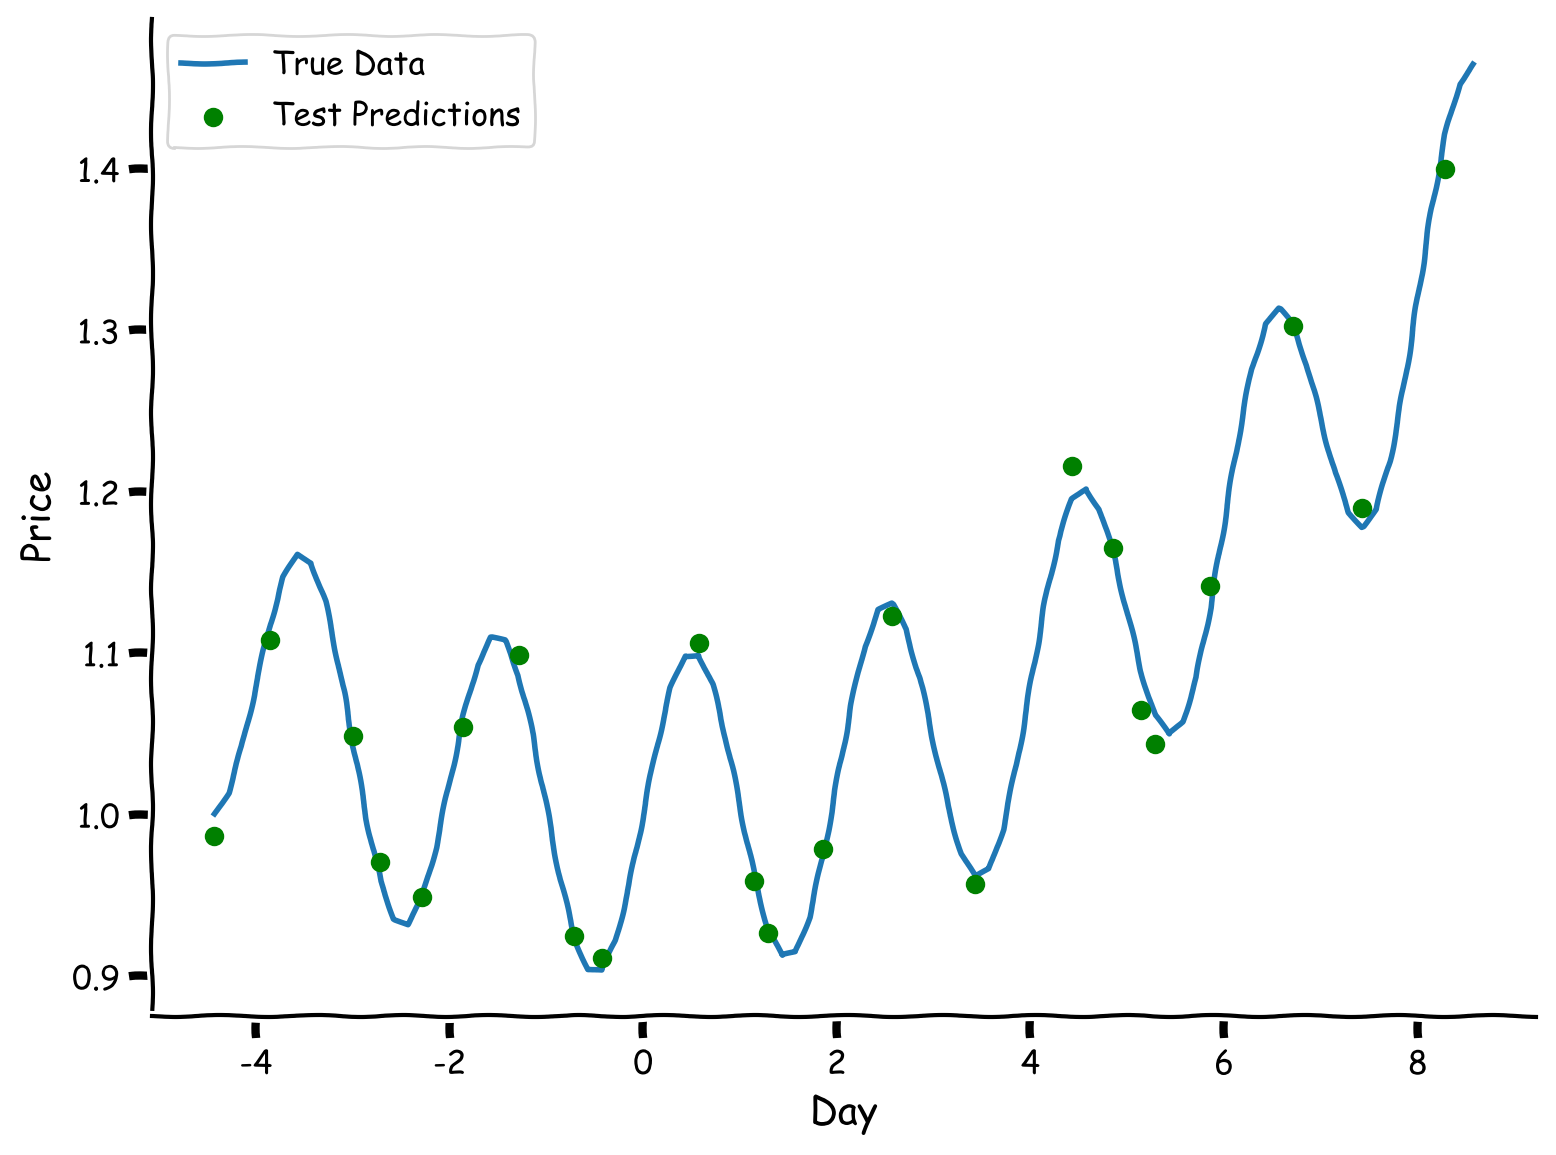

In [11]:
# @markdown Make sure you execute this cell to observe the plot!

#predict for test set
summer_prices_test_predictions = model.predict(summer_days_test_norm)

with plt.xkcd():
  plt.plot(summer_days, summer_prices, label = "True Data")
  plt.scatter(summer_days_test, summer_prices_test_predictions, label = "Test Predictions", marker='o', color='g', zorder=2)
  plt.xlabel('Day')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

Now that we've learned about prices during the summer, can we predict what prices will be in autumn? Let's see how well our summer-trained model can do.

In [12]:
#take only autumn data
autumn_days = np.expand_dims(days[243:334], 1)
autumn_prices = prices[243:334]

#apply normalization (pay attention to the fact that we use summer metrics as the model was trained on them!)
autumn_days_norm = (autumn_days - summer_days_mean) / summer_days_std

#evaluate MLP on normalized autumn data
print(f"R-squared value is: {model.score(autumn_days_norm, autumn_prices):.02f}.")

R-squared value is: -11.72.


The R-squared value dropped significantly; let's observe what is going on visually.

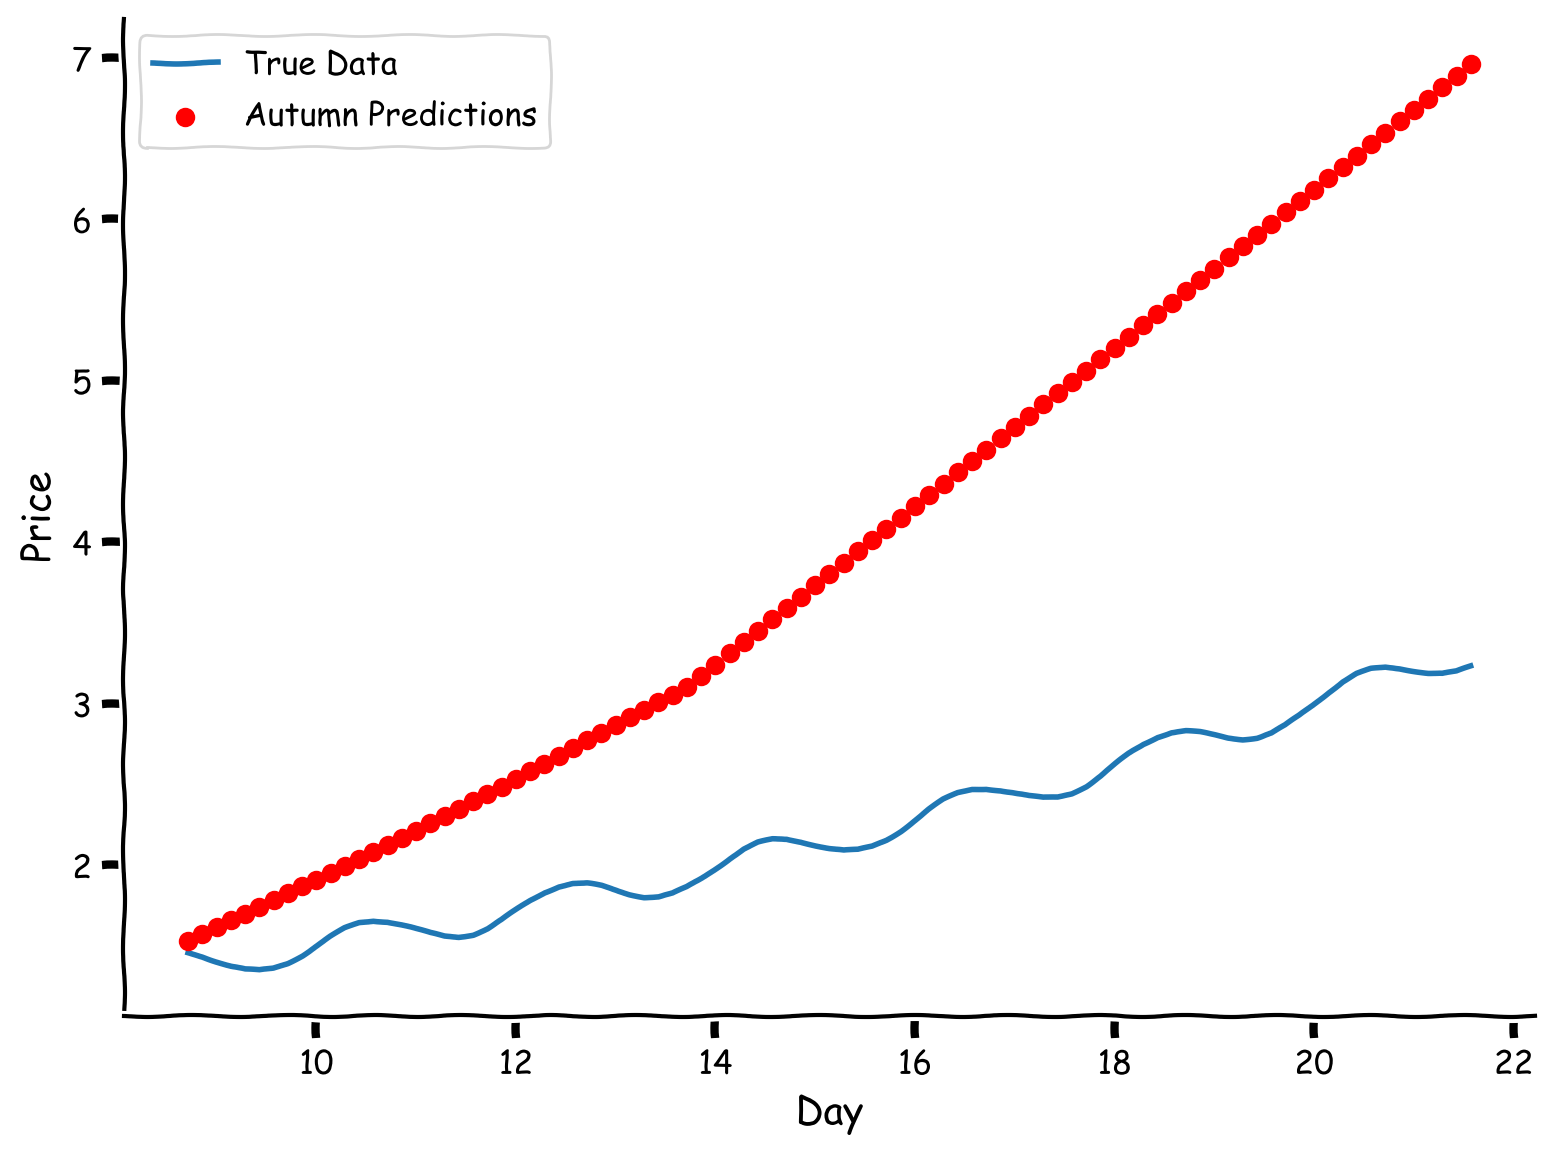

In [13]:
# @markdown Make sure you execute this cell to observe the plot!

#predict for test set
autumn_prices_predictions = model.predict(autumn_days_norm)

with plt.xkcd():
  plt.plot(autumn_days, autumn_prices, label = "True Data")
  plt.scatter(autumn_days, autumn_prices_predictions, label = "Autumn Predictions", marker='o', color='r', zorder=2)
  plt.xlabel('Day')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

### Coding Exercise 1 Discussion

1. How would you qualitatively evaluate the model performance on autumn data? Does it capture the annual trend? Does it capture weekly trend?


In [14]:
#to_remove explanation

"""
Discussion: How would you qualitatively evaluate the model performance on autumn data? Does it capture the annual trend? Does it capture weekly trend?

Model predictions are completely invariant to the weekly seasonality of the data, though it somewhat captures the increasing trend.
Thus, definitely, it can't be used for making quality predictions on the daily basis.
""";

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_fitting_pricing_data_to_mlp")

## Interactive Demo 1: Covariate shift impact on predictability power

In this interactive demo, you are going to explore how well the model generalizes to other months using two dropdown menus for selecting start and end months.

!N.B.: Note that for summer months we will have some training data included in the predictions evaluation too.

In [15]:
# @markdown Make sure you execute this cell to enable the widget!

@widgets.interact
def interactive_predict(start_month = widgets.Dropdown(description = "Start Month", options = months), end_month = widgets.Dropdown(description = "End Month", options = months)):
    predict(start_month, end_month)

interactive(children=(Dropdown(description='Start Month', options=('January', 'February', 'March', 'April', 'M…

### Interactive Demo 1 Discussion

1. Does the power of covariate shift impact the model performance? What happens on the borders of the training period, does the model still capture the fraction of dynamics right before/after it?

In [16]:
#to_remove explanation

"""
Discussion: Does the power of covariate shift impact the model performance? What happens on the borders of the training period, does model still capture the fraction of dynamics right before/after it?

Indeed, the bigger the power of covariate shift (the more distinct the days are), the worse performance we observe. In both border-cases model performs poorly, what is more - even on the fraction of training data near these regions we can observe that model is going to lose the desired dynamics.
""";

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_covariate_shift_impact_on_predictability_power")

---

# Section 2: Concept shift

Estimated timing to here from start of tutorial: 20 minutes

In this section we are going to explore another case of distribution shift, which is different from covariate one, in its nature - concept shift.

## Coding Exercise 2: Change in day of supply

We saw how going from summer to autumn introduces covariate shifts, but what would lead to a concept shift in our fruit price relationship? One possibility: a change in the day of the week when fresh fruits are delivered. Let us take a look at the modeling equation again:

$$f(x) = A x^{2} + B sin(\pi x + \phi) + C$$

Which variable, do you think, we need to change, so that now we would receive fresh fruits, let's say, 2 days later than it was before?
<details>
<summary>Answer</summary>
<br>
Yep, indeed, it is all about sinusoid phase shift - we only need to change $\phi$ value.
</details>

Let us take a look how well model generalizes to this unexpected change as well.

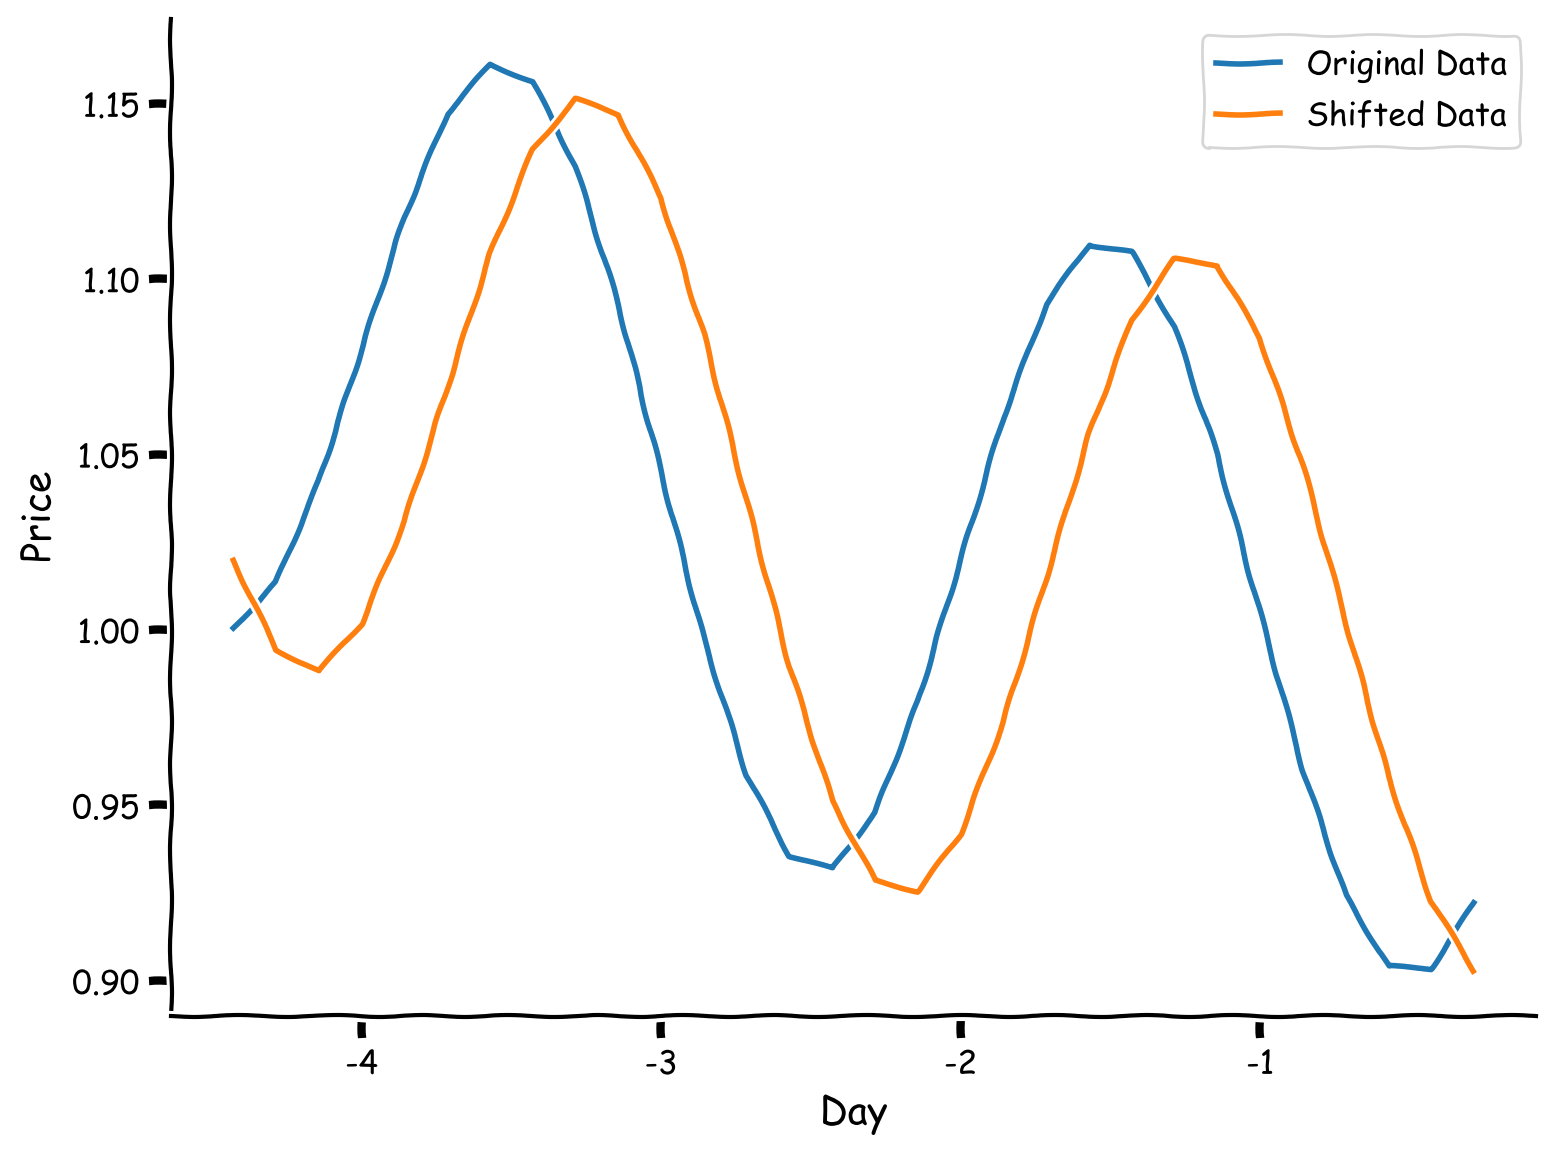

In [17]:
shifted_phi = - 2 * np.pi / 7
shifted_prices = A * days**2 + B * np.sin(np.pi*days + shifted_phi) + C

#plot relation between days, prices & shifted prices for June
with plt.xkcd():
  plt.plot(days[151:181], prices[151:181], label = "Original Data")
  plt.plot(days[151:181], shifted_prices[151:181], label = "Shifted Data")
  plt.xlabel('Day')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

In [ ]:
#take only summer shifted data
summer_days = np.expand_dims(days[151:243], 1)
summer_prices_shifted = shifted_prices[151:243]

#apply normalization (pay attention to the fact that we use summer metrics as the model was trained on them!)
summer_days_norm = (summer_days - summer_days_mean) / summer_days_std

###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: check r-squared values for original and shifted prices")
###################################################################

#evaluate MLP on normalized original & shifted data
print(f"R-squared value for original prices is: {model.score(..., ...):.02f}.")
print(f"R-squared value for shifted prices is: {model.score(..., ...):.02f}.")

In [18]:
# to_remove solution

#take only summer shifted data
summer_days = np.expand_dims(days[151:243], 1)
summer_prices_shifted = shifted_prices[151:243]

#apply normalization (pay attention to the fact that we use summer metrics as the model was trained on them!)
summer_days_norm = (summer_days - summer_days_mean) / summer_days_std

#evaluate MLP on normalized original & shifted data
print(f"R-squared value for original prices is: {model.score(summer_days_norm, summer_prices):.02f}.")
print(f"R-squared value for shifted prices is: {model.score(summer_days_norm, summer_prices_shifted):.02f}.")

R-squared value for original prices is: 1.00.
R-squared value for shifted prices is: 0.75.


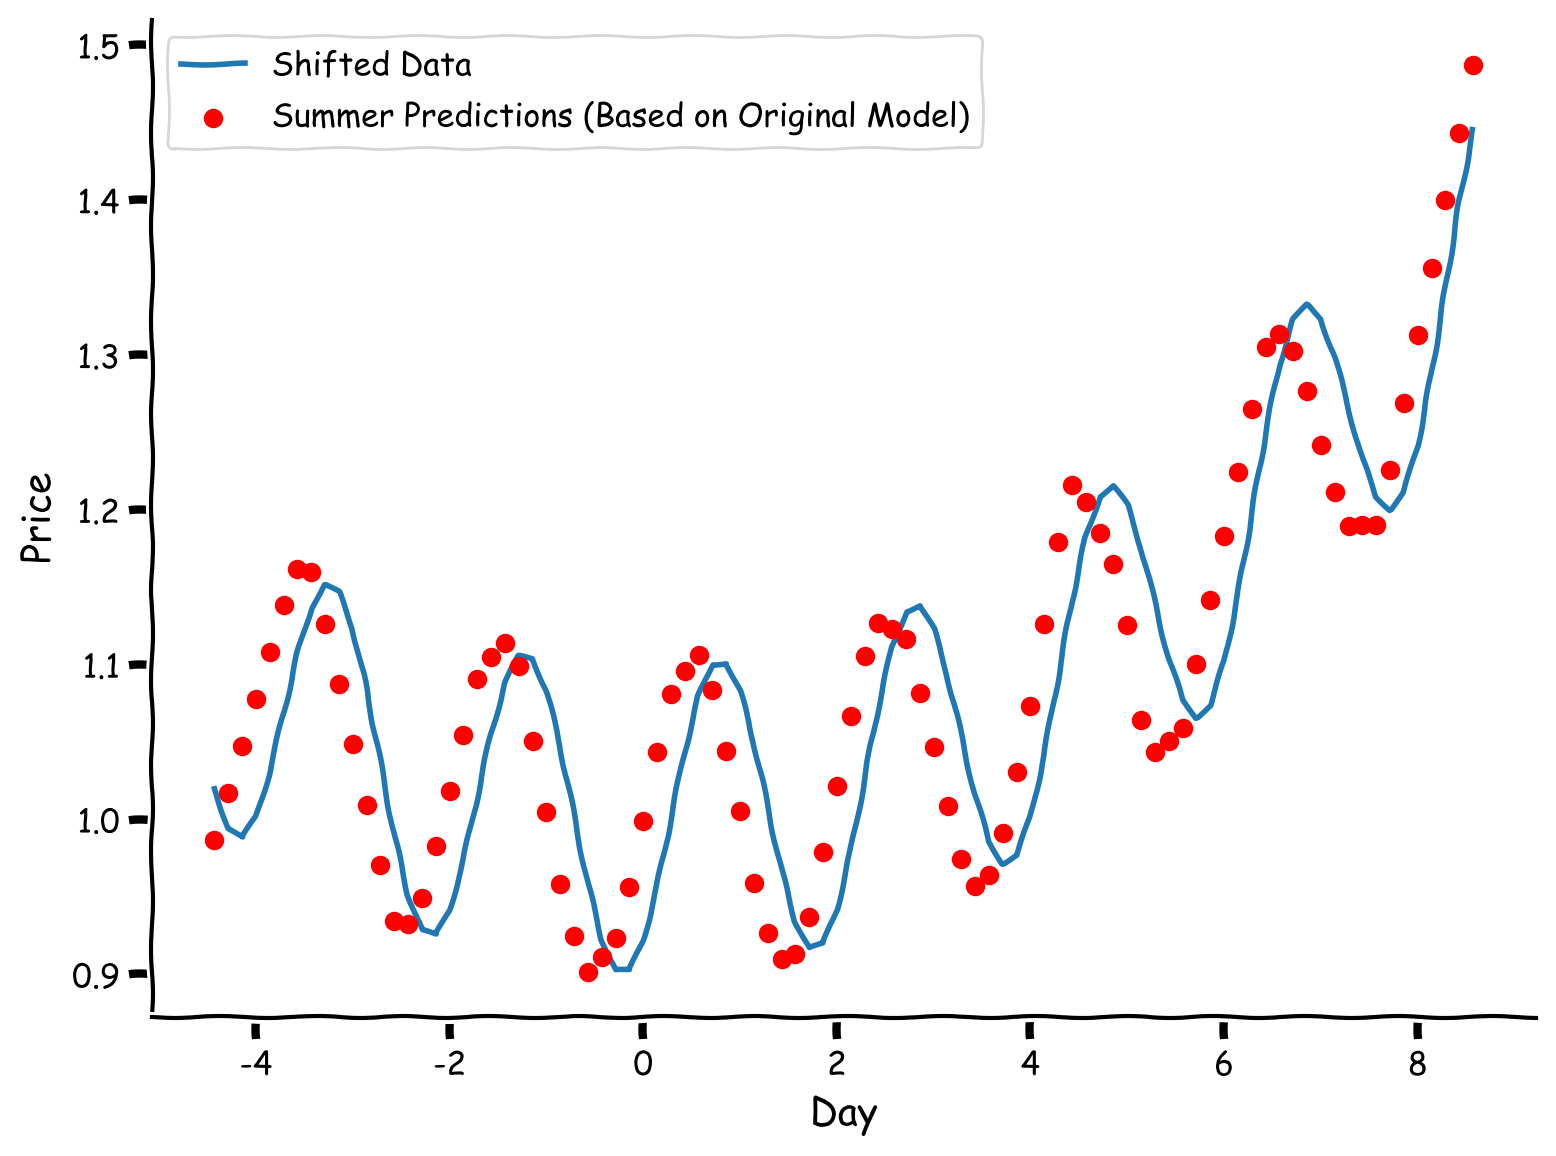

In [19]:
# @markdown Make sure you execute this cell to observe the plot!

#predict for summer days
summer_prices_predictions = model.predict(summer_days_norm)

with plt.xkcd():
  plt.plot(summer_days, summer_prices_shifted, label = "Shifted Data")
  plt.scatter(summer_days, summer_prices_predictions, label = "Summer Predictions (Based on Original Model)", marker='o', color='r', zorder=2)
  plt.xlabel('Day')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

Indeed, the model predictions are capturing the original phase, not the phase shifted function.

### Coding Exercise 2 Discussion

1. Why do you think R-squared value is still higher for this particular example of concept shift in comparison to the covariate one?

In [20]:
#to_remove explanation

"""
Discussion: Why do you think R-squared value is still higher for this particular example of concept shift in comparison to the covariate one?

In this example, concept shift preserves the annual and weekly trends (we can see that predicitions oscillate the same way as the shifted function), thus R-squared value is relatively high.
""";

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_change_in_day_of_supply")

---

## Think! 2: Examples of concept shift

What other examples of concept shift could you come up with in the context of the "fruits prices" task? What variables would these shifts impact?

Take 2 minutes to think, then discuss as a group.

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_examples_of_concept_shift")

---
# Summary

*Estimated timing of tutorial: 35 minutes*

Here we learned:

1. About covariate and concept shifts as two different types of data distribution shifts

2. How such distribution shifts negatively impact model performance.

During the next tutorials we are going to address this question of generalization - what are the techniques and methods to deal with poor generalization performance due to distribution shifts.